# Importing...

In [14]:
import pandas as pd

In [15]:
import seaborn as sns

In [16]:
import numpy as np

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
from sklearn.tree import DecisionTreeClassifier

In [19]:
def calculate_accuracy(predictions, actuals):
    if(len(predictions) != len(actuals)):
        raise Exception("The amount of predictions did not equal the amount of actuals")
    
    return (predictions == actuals).sum() / len(actuals)

In [20]:
pokemon = pd.read_csv('../Dataset.csv', sep=',').dropna()
pokemon['Legendary'] = pokemon['Legendary'].astype(str)

# Training a decision tree to predict if a pokemon is legendary based on their BST (sum of all base stats)...

In [21]:
pokemon_train, pokemon_test = train_test_split(pokemon, test_size=0.3, random_state=42, stratify=pokemon['Legendary'])
print(pokemon_train.shape, pokemon_test.shape)

(383, 44) (165, 44)


In [22]:
features= ['BST']
dt_classification = DecisionTreeClassifier(max_depth = 10)
dt_classification.fit(pokemon_train[features], pokemon_train['Legendary'])

DecisionTreeClassifier(max_depth=10)

In [23]:
predictionsOnTrainset = dt_classification.predict(pokemon_train[features])
predictionsOnTestset = dt_classification.predict(pokemon_test[features])

In [24]:
accuracyTrain = calculate_accuracy(predictionsOnTrainset, pokemon_train.Legendary)
accuracyTest = calculate_accuracy(predictionsOnTestset, pokemon_test.Legendary)
print("Accuracy on training set " + str(accuracyTrain))
print("Accuracy on test set " + str(accuracyTest))

Accuracy on training set 0.9686684073107049
Accuracy on test set 0.9454545454545454


I expected a high accuracy on both, because I know for a fact there is a correlation here. Even with a smaller (test) dataset, it's quite apparent that a pokemon is legendary if the BST is very high.

## Making a plottree...

In [25]:
from sklearn import tree
import graphviz

def plot_tree_classification(model, features, class_names):
    # Generate plot data
    dot_data = tree.export_graphviz(model, out_file=None, 
                          feature_names=features,  
                          class_names=class_names,  
                          filled=True, rounded=True,  
                          special_characters=True)  

    # Turn into graph using graphviz
    graph = graphviz.Source(dot_data)  

    # Write out a pdf
    graph.render("decision_tree")

    # Display in the notebook
    return graph 

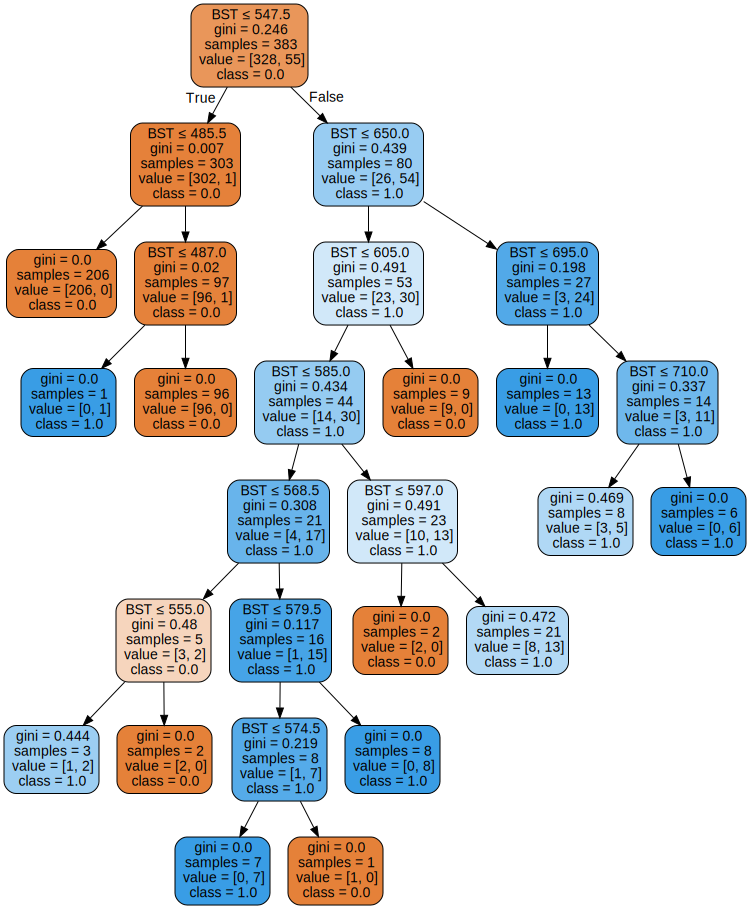

In [26]:
plot_tree_classification(dt_classification, features, np.sort(pokemon.Legendary.unique()))